# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df= pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
print(merge_df.shape)
merge_df.head()

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice_list= merge_df["Mouse ID"].nunique()
total_mice_list

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_ids= merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False),'Mouse ID'].unique()
duplicated_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_filter_series = merge_df['Mouse ID'].isin(duplicated_mouse_ids)
duplicated_mouse_data = merge_df.loc[duplicated_mouse_filter_series]
duplicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
clean_df = merge_df.loc[~duplicated_mouse_filter_series]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df['Mouse ID'].nunique()
clean_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_group= merge_df.groupby("Drug Regimen")
tumor_mean= tumor_group["Tumor Volume (mm3)"].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
tumor_median= tumor_group["Tumor Volume (mm3)"].median()
tumor_var= tumor_group["Tumor Volume (mm3)"].var()
tumor_std= tumor_group["Tumor Volume (mm3)"].std()
tumor_sem= tumor_group["Tumor Volume (mm3)"].sem()

In [10]:
# Assemble the resulting series into a single summary DataFrame.
summary= pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                      "Median Tumor Volume": tumor_median,
                      "Tumor Volume Variance": tumor_var,
                      "Tumor Volume Std. Dev.": tumor_std,
                      "Tumor Volume Std. Err.": tumor_sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
aggeration= tumor_group["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
aggeration

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
timepoint_by_group = tumor_group["Drug Regimen"].value_counts()
timepoint_by_group

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: count, dtype: int64

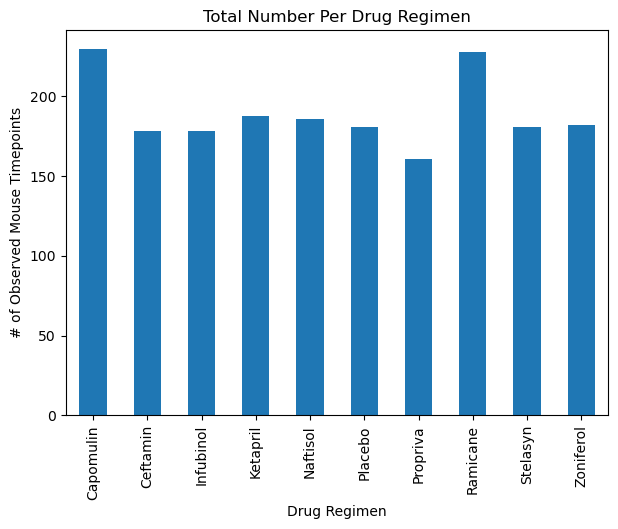

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_by_group.plot(kind="bar", figsize=(7,5))
plt.title("Total Number Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

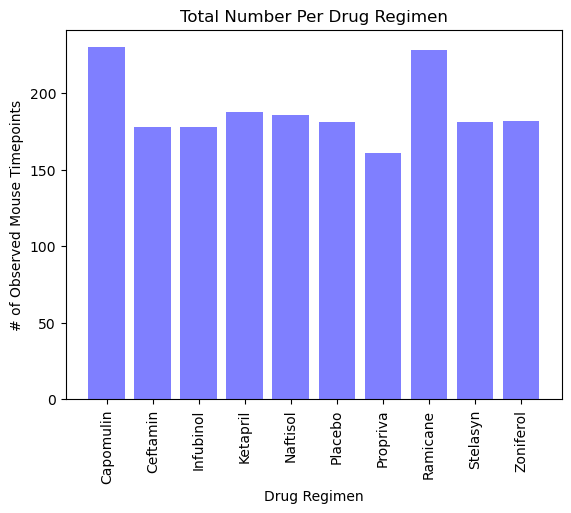

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=['Capomulin', 'Ceftamin','Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.bar(x_axis, timepoint_by_group, color='b', alpha=0.5, align="center")
plt.title("Total Number Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

In [15]:
mice_sex=clean_df.iloc[:,5]
mice_sex

0       Female
1         Male
2       Female
3       Female
4         Male
         ...  
1888      Male
1889      Male
1890    Female
1891    Female
1892    Female
Name: Sex, Length: 1880, dtype: object

In [16]:
sex_group= clean_df.groupby("Sex")
mice_sex = sex_group["Sex"].value_counts()
mice_sex

Sex
Female    922
Male      958
Name: count, dtype: int64

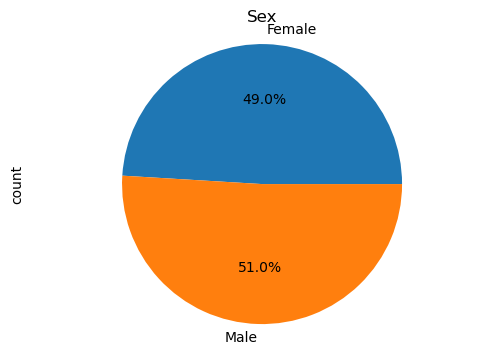

In [17]:
sex_chart = mice_sex.plot(kind='pie', figsize=(6,4),autopct="%1.1f%%",startangle=1800)
plt.axis("equal")
plt.title("Sex")
plt.show()

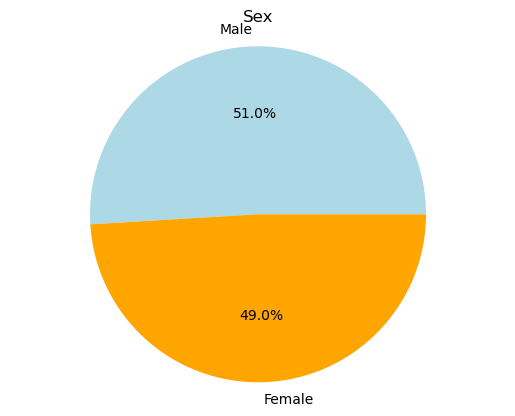

In [18]:
sex = ["Male", "Female"]
sex_percent = [958,922]
colors = ["lightblue","orange"]
explode = (0,0)
plt.pie(sex_percent, explode=explode, labels=sex, colors=colors,autopct="%1.1f%%",startangle=360)
plt.axis("equal")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across the four most promising treatments based on final tumor volume
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby(['Mouse ID']).max()[['Timepoint']].reset_index()
last_timepoint_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [21]:
# Merge this group df with the clean DataFrame to get the tumor volume at the last timepoint
final_df =pd.merge(clean_df,last_timepoint_df, on=['Mouse ID', 'Timepoint'], how= 'inner')
final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol=[]

# For each of the treatment regimens:
for drug in Treatment:   
    # Locate the rows which contain mice on this drug and get the tumor volumes as a series
    drug_filter_series = final_df['Drug Regimen']== drug
    print(drug)
    drug_final_tumor_series = final_df.loc[drug_filter_series, 'Tumor Volume (mm3)']

    # add  the volume series to the final_tumor_vol[] list 
    final_tumor_vol.append(drug_final_tumor_series)
    
    # Calculate the IQR, lower bound, upper bound,for this drug and quantitatively determine if there are any potential outliers for this drug. 
    quartiles = drug_final_tumor_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5

    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The interquartile * 1.5 range of temperatures is: {iqr_1_5}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



Capomulin
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The interquartile * 1.5 range of temperatures is: 11.672795190000006
The the median of temperatures is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The interquartile * 1.5 range of temperatures is: 13.647805079999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The interquartile * 1.5 range of temperatures is: 17.2157

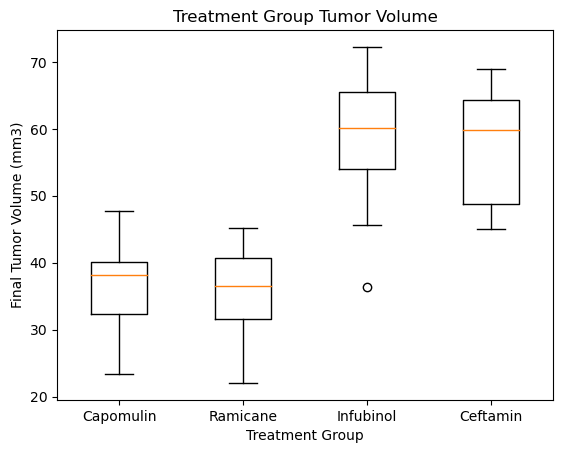

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment Group Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Treatment Group')
ax1.boxplot(final_tumor_vol,labels = ['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

In [25]:
capomulin= merge_df.loc[merge_df['Drug Regimen']=='Capomulin',:]


In [26]:
capomulin_i= capomulin.loc[capomulin['Mouse ID'] == 'l509',:]


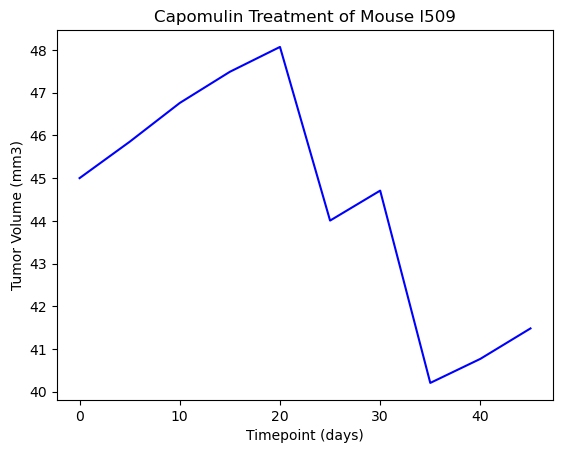

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_plot= plt.plot(capomulin_i['Timepoint'], capomulin_i['Tumor Volume (mm3)'], color="blue")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [28]:
capomulin_unique= capomulin.groupby('Mouse ID')
capomulin_mean= capomulin_unique["Tumor Volume (mm3)"].mean()


In [29]:
capomulin_weight= capomulin.drop_duplicates(subset="Mouse ID")
capomulin_weight_order=capomulin_weight.sort_values('Mouse ID', ascending=True)


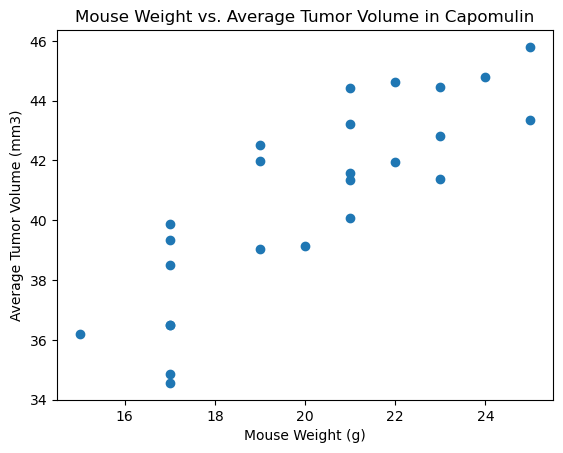

In [30]:
#Scatter Plot for Mouse weight vs. avg tumor volume in Capomulin
plt.scatter(capomulin_weight_order['Weight (g)'], capomulin_mean, marker="o")
plt.title("Mouse Weight vs. Average Tumor Volume in Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(capomulin_weight_order['Weight (g)'], capomulin_mean)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


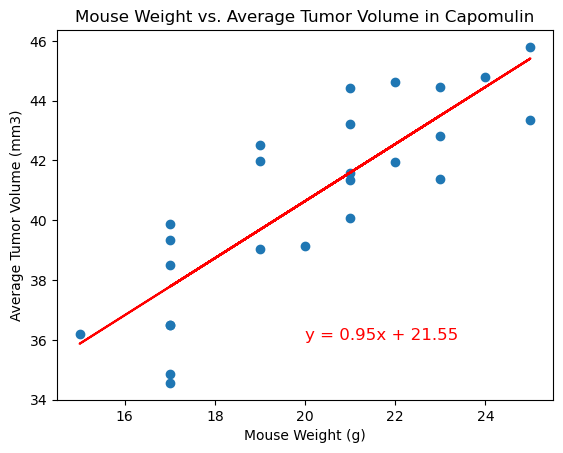

The r-value is: 0.8419363424694721
y = 0.95x + 21.55


In [32]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_weight_order['Weight (g)']
y_values = capomulin_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume in Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The r-value is: {rvalue}")
print(line_eq)